**Installing Necessary Libraries**

In [1]:
!pip install pandas numpy scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# pandas and numpy are used for data manipulation and numerical operations.
# train_test_split is used to split the dataset into training and testing sets.
# LinearRegression, Ridge, and RandomForestRegressor are the machine learning models used.
# mean_absolute_error and mean_squared_error are metrics for evaluating model performance.
# matplotlib and seaborn are used for data visualization.

# Load the dataset
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

**Data Cleaning**

In [ ]:
data.isna().sum()

Month                         0
Year                          0
AP (Atmospheric Pressure)     0
RH2M Humidity                 0
WS2M Wind Speed               0
Temp (Max)                    0
Temp (Min)                    0
Past Precipitation Records    0
dtype: int64

In [ ]:

data = data.dropna()

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Load the dataset
file_path = '/content/data.xlsx'
data = pd.read_excel(file_path)

# Rename columns to avoid spaces and special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Mapping month names to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Convert month names to numeric values
if 'Month' in data.columns:
    data['Month'] = data['Month'].map(month_map)

In [ ]:
data.isna().sum()

Month                         0
Year                          0
AP_Atmospheric_Pressure       0
RH2M_Humidity                 0
WS2M_Wind_Speed               0
Temp_Max                      0
Temp_Min                      0
Past_Precipitation_Records    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()

Handling Missing Values


In [ ]:
# Handle missing values
# The dataset is loaded using pandas. Missing values are handled by filling them with the mean of the respective columns to prevent data loss.
data = data.dropna()

In [ ]:
data.describe()

Month         Year  AP_Atmospheric_Pressure  RH2M_Humidity  \
count  276.000000   276.000000               276.000000     276.000000   
mean     6.500000  2011.000000               101.337935      85.426449   
std      3.458323     6.645299                 0.503406       2.884077   
min      1.000000  2000.000000                99.550000      76.440000   
25%      3.750000  2005.000000               101.067500      83.500000   
50%      6.500000  2011.000000               101.390000      85.530000   
75%      9.250000  2017.000000               101.650000      87.500000   
max     12.000000  2022.000000               102.610000      92.120000   

       WS2M_Wind_Speed    Temp_Max    Temp_Min  Past_Precipitation_Records  
count       276.000000  276.000000  276.000000                  276.000000  
mean          6.452138   13.231957    7.576486                    1.430072  
std           1.266222    3.833821    4.195518                    2.238887  
min           3.930000    5.370000   -1.450000                    0.000000  
25%           5.477500    9.857500    3.925000                    0.000000  
50%           6.215000   13.210000    6.680000                    0.000000  
75%           7.360000   16.730000   11.605000                    3.105000  
max          10.040000   21.340000   15.290000                    5.270000

Handling Outliers

In [ ]:
# Visualizing outliers with boxplots

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data["RH2M_Humidity"])

plt.subplot(1, 3, 2)
sns.boxplot(data["WS2M_Wind_Speed"])

plt.subplot(1, 3, 3)
sns.boxplot(data["Temp_Max"])

plt.tight_layout()
plt.show()


<ipython-input-36-d833f1aa9ba1>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


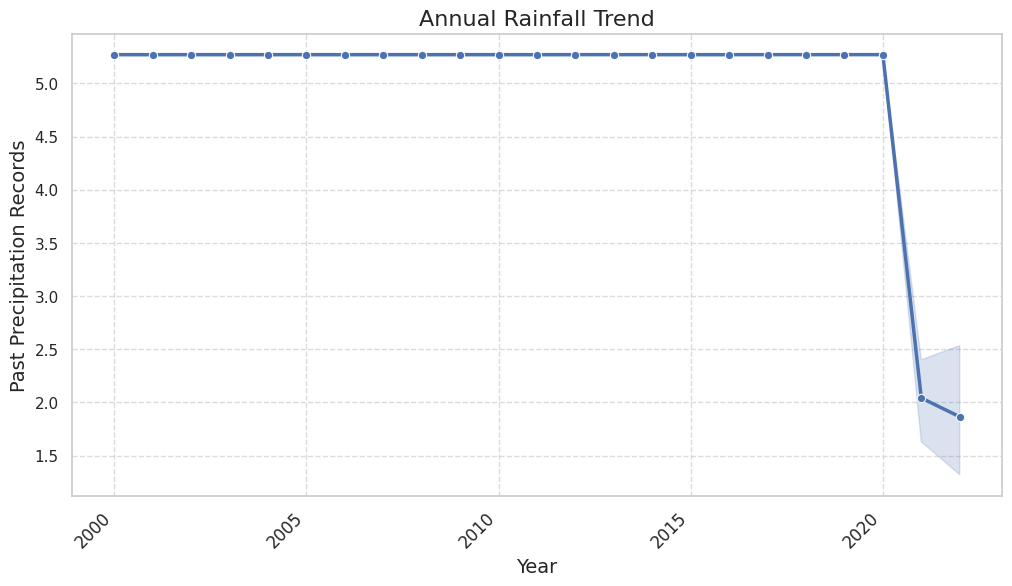

In [ ]:
# Filter out rows where 'Past Precipitation Records' is 0
filtered_df = data[data['Past_Precipitation_Records'] != 0]

# Set up the figure
plt.figure(figsize=(12, 6))

# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create the line plot
sns.lineplot(
    data=filtered_df,
    x='Year',
    y='Past_Precipitation_Records',
    marker='o',  # Add markers to the line plot
    linewidth=2.5,  # Slightly thicker line for better visibility
    color='b',  # Color of the line
    palette='deep'  # Use a color palette for better visual appeal
)

# Set title and labels with enhanced font sizes
plt.title('Annual Rainfall Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Past Precipitation Records', fontsize=14)

# Improve the x-axis labels readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines with a light color
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()



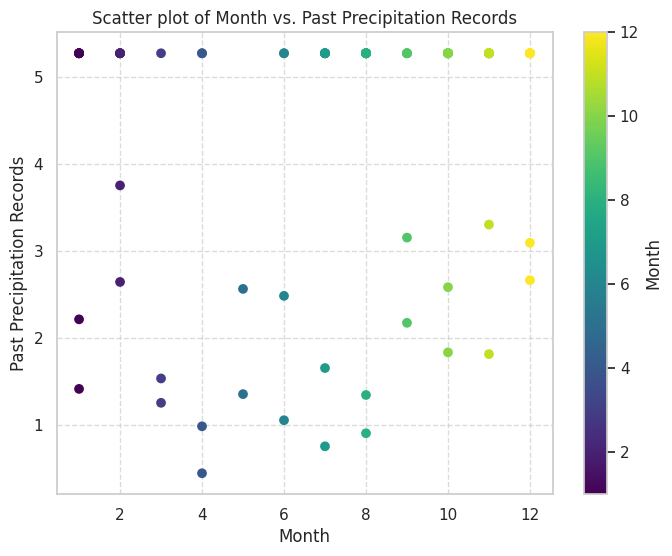

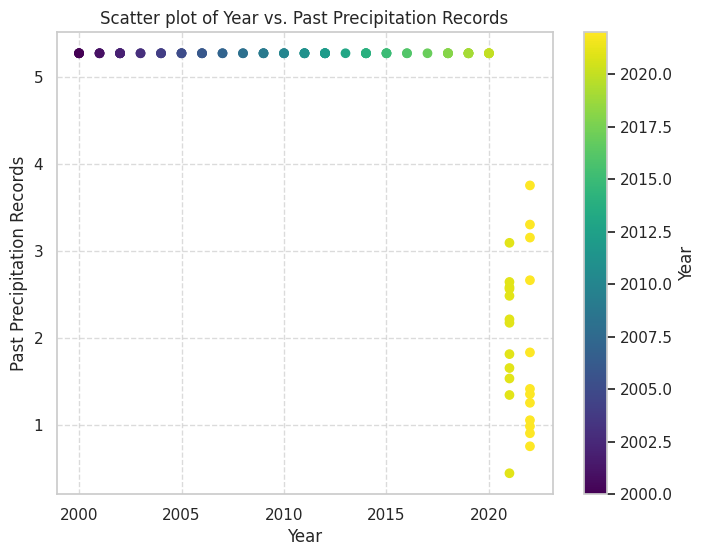

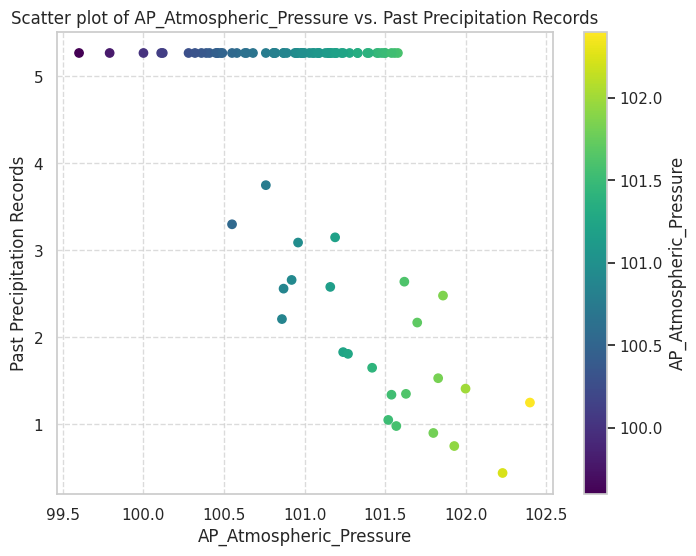

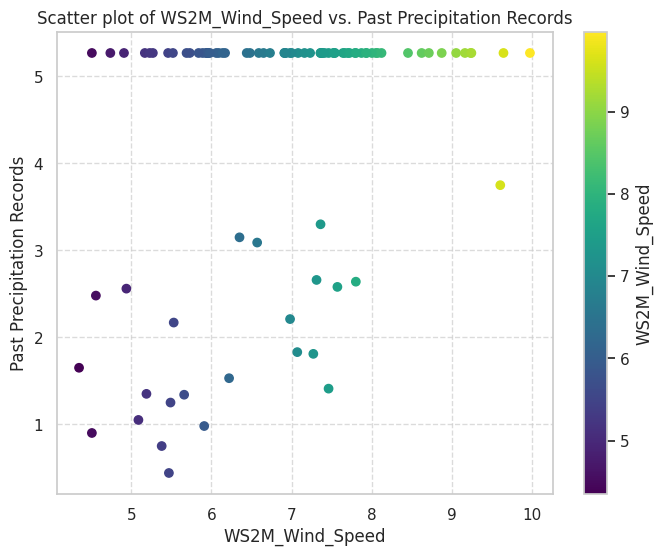

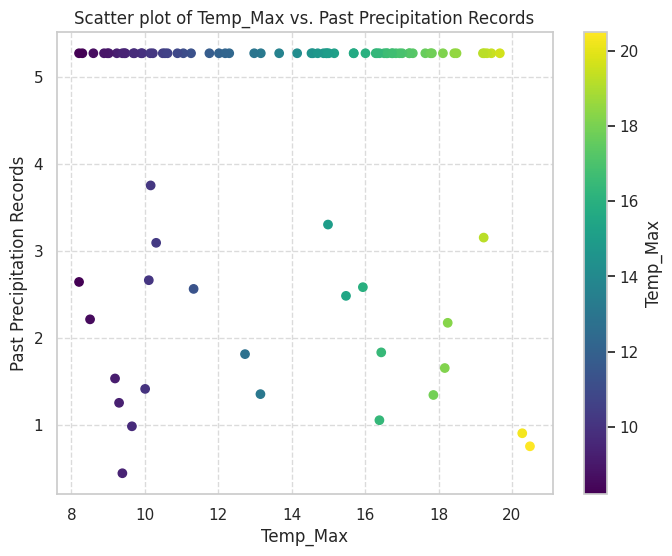

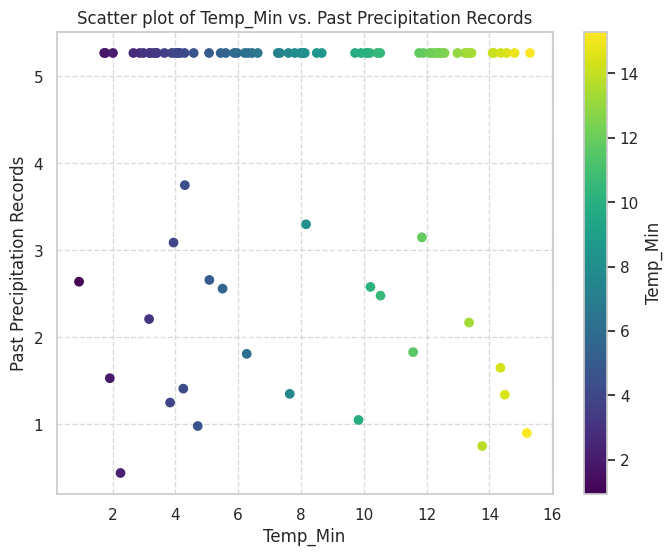

In [ ]:
# Filter out rows where 'Past Precipitation Records' is 0
filtered_data = data[data['Past_Precipitation_Records'] != 0]

# Iterate over columns to create scatter plots
for column in filtered_data.columns:
    if column != 'Past_Precipitation_Records':
        plt.figure(figsize=(8, 6))
        if filtered_data[column].dtype in ['int64', 'float64']:

            # Scatter plot for numerical features vs. 'Past Precipitation Records'
            plt.scatter(
                filtered_data[column],
                filtered_data['Past_Precipitation_Records'],
                c=filtered_data[column],
                cmap='viridis'
            )
            plt.colorbar(label=column)  # Add a colorbar to show the color scale
            plt.xlabel(column)
            plt.ylabel('Past Precipitation Records')
            plt.title(f'Scatter plot of {column} vs. Past Precipitation Records')

            # Add gridlines for better readability
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()


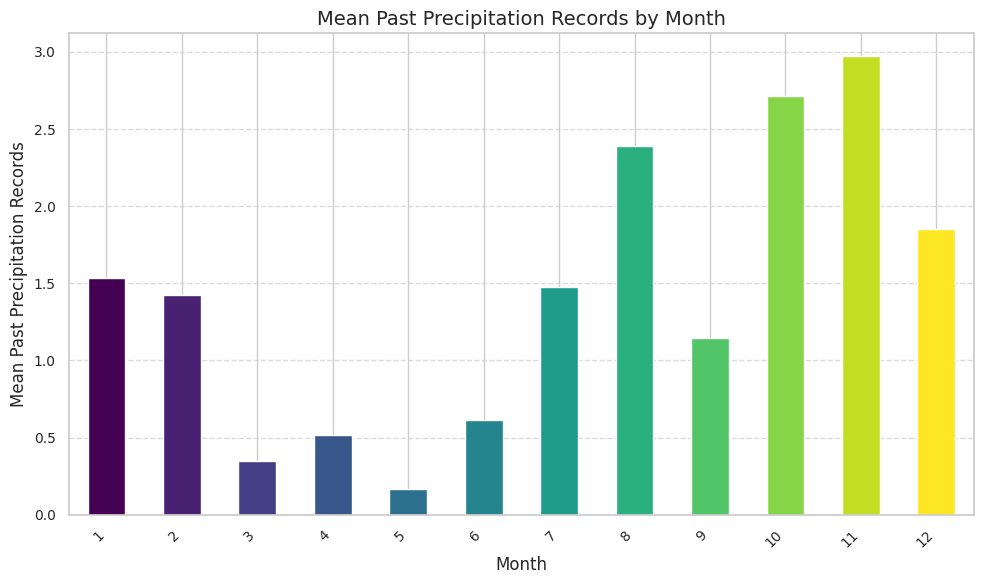

In [ ]:
# Monthly average precipitation Visualization

# Group the data by month and calculate the mean precipitation for each month
monthly_precipitation = data.groupby('Month')['Past_Precipitation_Records'].mean()
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_precipitation)))
monthly_precipitation.plot(kind='bar', color=colors)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Past Precipitation Records', fontsize=12)
plt.title('Mean Past Precipitation Records by Month', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
plt.tight_layout()
plt.show()


In [ ]:
# Visualization on how the weather variables (each separately) changes yearly.

# Group the data by year and calculate the mean for each weather variable
yearly_data = data.groupby('Year')[['AP_Atmospheric_Pressure', 'RH2M_Humidity', 'WS2M_Wind_Speed', 'Temp_Max', 'Temp_Min']].mean()

# Create subplots for each weather variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot each variable separately
yearly_data['AP_Atmospheric_Pressure'].plot(ax=axes[0, 0], marker='o', linestyle='-', color='blue')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Mean Atmospheric Pressure')
axes[0, 0].set_title('Yearly Trend of Atmospheric Pressure')

yearly_data['RH2M_Humidity'].plot(ax=axes[0, 1], marker='o', linestyle='-', color='green')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Mean Humidity')
axes[0, 1].set_title('Yearly Trend of Humidity')

yearly_data['WS2M_Wind_Speed'].plot(ax=axes[1, 0], marker='o', linestyle='-', color='red')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Mean Wind Speed')
axes[1, 0].set_title('Yearly Trend of Wind Speed')

yearly_data['Temp_Max'].plot(ax=axes[1, 1], marker='o', linestyle='-', color='purple')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Mean Temp (Max)')
axes[1, 1].set_title('Yearly Trend of Temp (Max)')

plt.tight_layout()
plt.show()


In [ ]:
# Pairplot
#Select only numeric columns for the pair plot
numeric_columns = ['AP_Atmospheric_Pressure', 'RH2M_Humidity', 'WS2M_Wind_Speed', 'Temp_Max', 'Temp_Min', 'Past_Precipitation_Records']

# Use a more visually appealing theme
sns.set_theme(style="ticks")

# Create the pair plot with enhanced aesthetics
pair_plot = sns.pairplot(data[numeric_columns],
                         hue='Past_Precipitation_Records',  # Color points by precipitation
                         palette='viridis',  # Use a vibrant color palette
                         markers=['o', 's', 'D', '^', 'v'],  # Vary marker styles
                         diag_kind='kde',  # Use kernel density estimation for diagonals
                         corner=True)  # Show only the lower triangle for conciseness

# Customize plot labels and title
pair_plot.fig.suptitle('Pairwise Relationships in Weather Data', y=1.02)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5

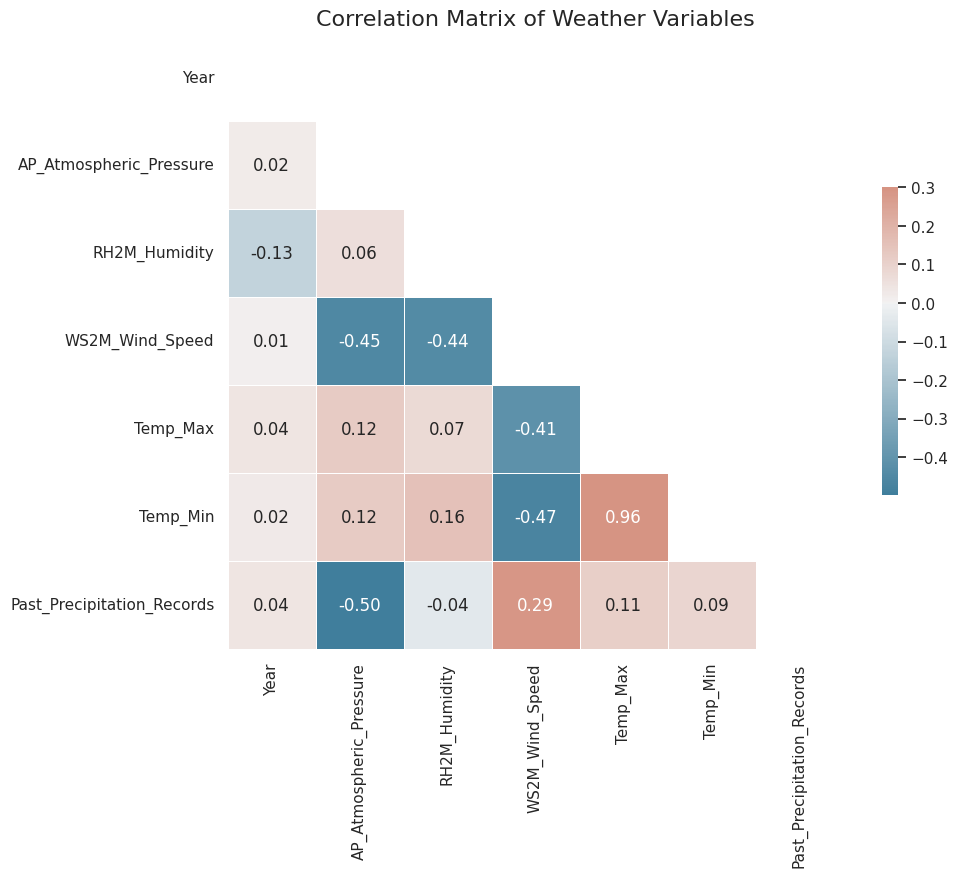

In [ ]:
# Calculate the correlation matrix, including 'Past Precipitation Records'
correlation_matrix = data[['Year', 'AP_Atmospheric_Pressure', 'RH2M_Humidity', 'WS2M_Wind_Speed', 'Temp_Max', 'Temp_Min', 'Past_Precipitation_Records']].corr()

# Set a visually appealing style
sns.set_theme(style="white")

# Create a mask for the upper triangle (for a cleaner look)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Set a clear title
plt.title('Correlation Matrix of Weather Variables', fontsize=16)

# Display the plot
plt.show()


# **FEATURE ENGINEERING**

**1. Past Precipitation Vs Season and Time**

In [ ]:
#Creating Season Feature
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)

# One-Hot Encoding for Season
df = pd.get_dummies(data, columns=['Season'], prefix='Season')

df.head(3)

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
0      1  2022                   102.00          86.50             7.46   
1      2  2022                   100.76          84.75             9.60   
2      3  2022                   102.40          86.31             5.49   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
0     10.01      4.25                        1.41          False   
1     10.16      4.30                        3.75          False   
2      9.30      3.83                        1.25          False   

   Season_Spring  Season_Summer  Season_Winter  
0          False          False           True  
1          False          False           True  
2           True          False          False

In [ ]:
# Average Rainfall by Season and Year
# Melt the data for better plotting
df_long = df.melt(id_vars=['Year', 'Past_Precipitation_Records'], # Use df instead of data
                  value_vars=['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
                  var_name='Season', value_name='Active')
df_long = df_long[df_long['Active']]

# Calculate average rainfall by season and year
seasonal_rainfall = df_long.groupby(['Year', 'Season'])['Past_Precipitation_Records'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(14, 8))

# Use a color palette for the seasons
palette = sns.color_palette("husl", 4)

# Create the line plot
sns.lineplot(data=seasonal_rainfall, x='Year', y='Past_Precipitation_Records', hue='Season',
             marker='o', palette=palette, linewidth=2.5)

# Add titles and labels with custom fonts and sizes
plt.title('Average Rainfall by Season and Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)

# Customize the legend
plt.legend(title='Season', title_fontsize='13', fontsize='11', loc='upper left')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a light grey background
plt.gca().set_facecolor('#f0f0f0')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Show the plot
plt.show()


<ipython-input-54-7002d1603740>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Season', y='Past_Precipitation_Records',


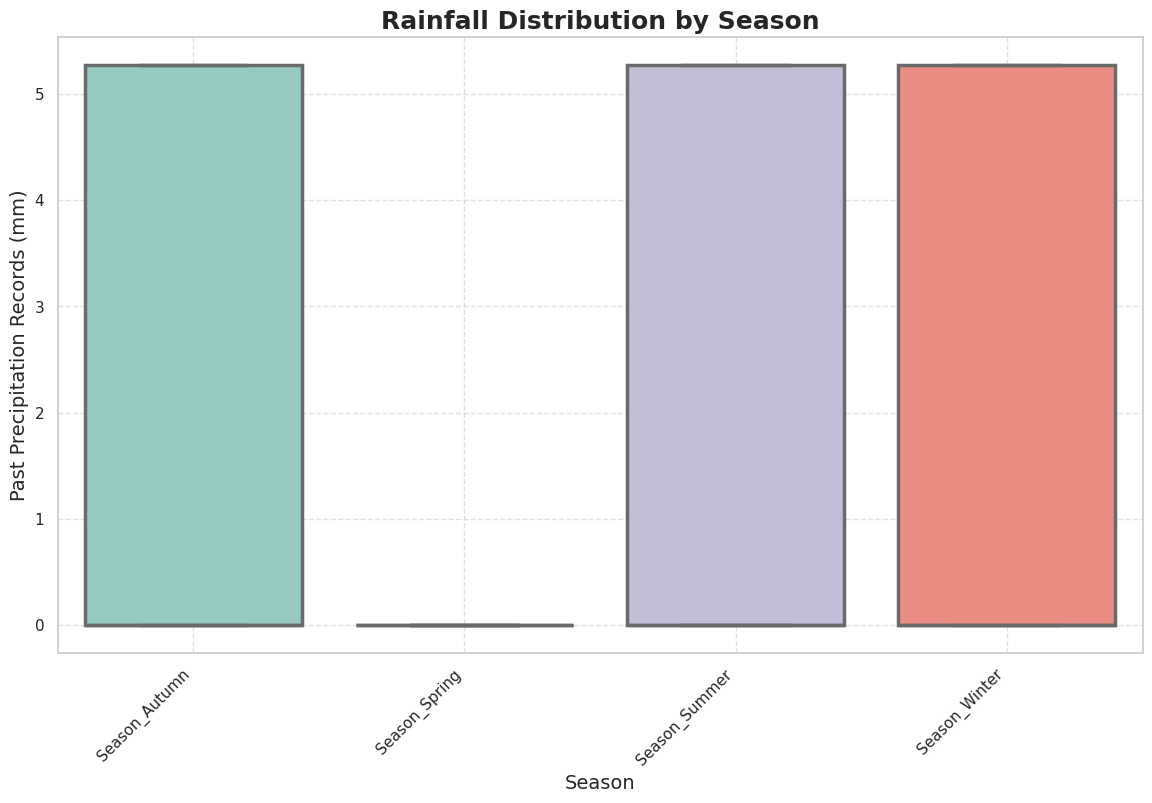

In [ ]:
# Rainfall Distribution by Season

sns.set_theme(style="whitegrid")

# Increase figure size for better visualization
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(data=df_long, x='Season', y='Past_Precipitation_Records',
            palette="Set3",  # Use a diverse color palette
            linewidth=2.5,  # Thicker lines for the boxes
            showfliers=False)  # Hide outliers for a cleaner look

# Add titles and labels with custom fonts and sizes
plt.title('Rainfall Distribution by Season', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Past Precipitation Records (mm)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a subtle grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


**2. Temperature Interactions with rainfall**

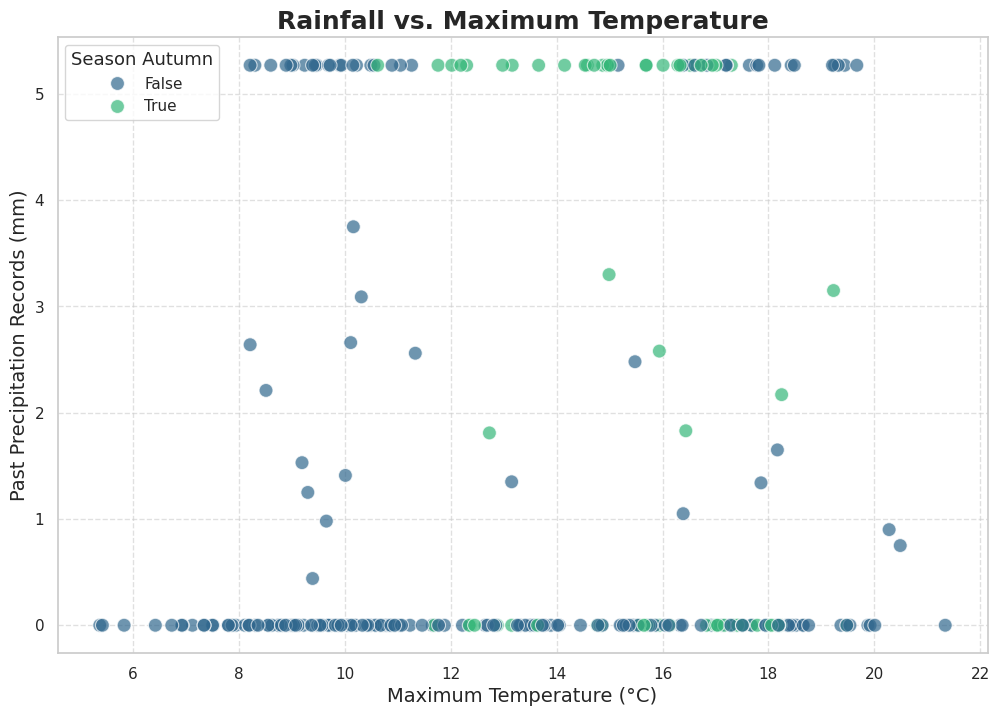

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df, x='Temp_Max', y='Past_Precipitation_Records',
                hue='Season_Autumn',  # Color points by Season_Autumn
                palette='viridis',  # Use a vibrant color palette
                s=100,  # Increase marker size for better visibility
                alpha=0.7)  # Add some transparency to the markers

# Add titles and labels with custom fonts and sizes
plt.title('Rainfall vs. Maximum Temperature', fontsize=18, fontweight='bold')
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Past Precipitation Records (mm)', fontsize=14)

# Customize the legend
plt.legend(title='Season Autumn', title_fontsize='13', fontsize='11', loc='upper left')

# Add a subtle grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [ ]:
data.head()

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
0      1  2022                   102.00          86.50             7.46   
1      2  2022                   100.76          84.75             9.60   
2      3  2022                   102.40          86.31             5.49   
3      4  2022                   101.57          85.19             5.91   
4      5  2022                   101.63          88.31             5.19   

   Temp_Max  Temp_Min  Past_Precipitation_Records  
0     10.01      4.25                        1.41  
1     10.16      4.30                        3.75  
2      9.30      3.83                        1.25  
3      9.65      4.71                        0.98  
4     13.15      7.64                        1.35

In [ ]:
# 1. Temperature Difference: Calculate Temp_Diff
df['Temp_Diff'] = df['Temp_Max'] - df['Temp_Min']

# 2. Pressure and Temperature Interaction: Calculate Pressure_Temp_Interaction
df['Pressure_Temp_Interaction'] = df['AP_Atmospheric_Pressure'] * df['Temp_Max']

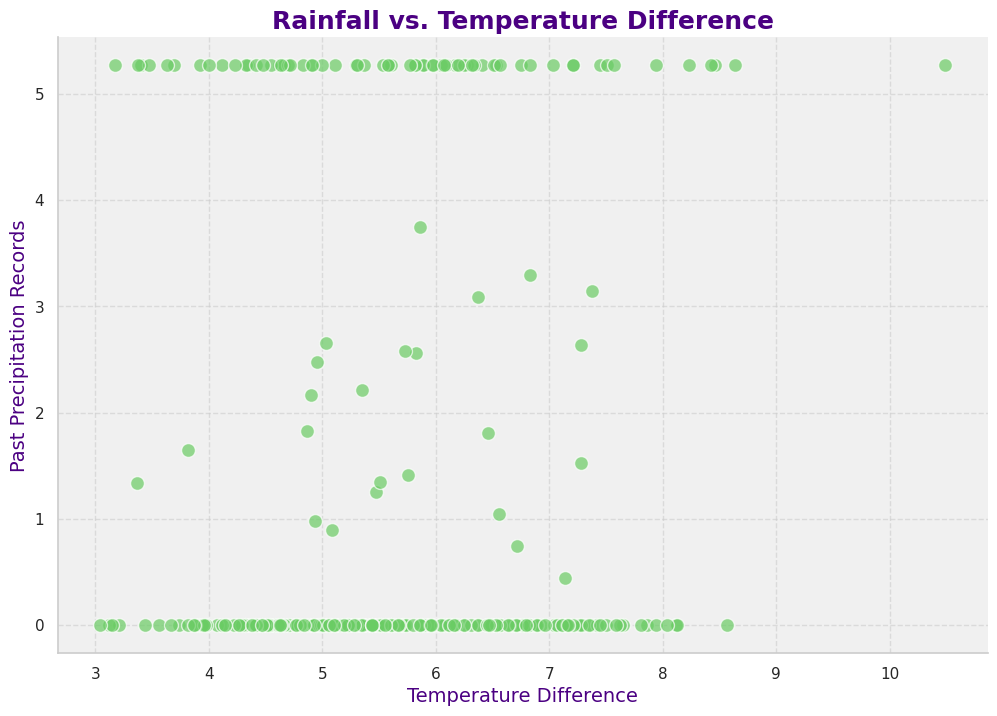

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verify if 'Temp_Diff' exists in the DataFrame
if 'Temp_Diff' not in df.columns:
    print("Error: 'Temp_Diff' column not found in DataFrame.")
    # If 'Temp_Diff' needs to be calculated, do so here. For example:
    # df['Temp_Diff'] = df['Temp_Max'] - df['Temp_Min']  # Replace 'Temp_Min' with the appropriate column if needed

# Set up the plot
plt.figure(figsize=(12, 8))

# Use a muted color palette for the scatter plot
palette = sns.color_palette("muted")

# Create the scatter plot with enhanced visuals
sns.scatterplot(data=df, x='Temp_Diff', y='Past_Precipitation_Records',  # Assuming 'Temp_Diff' now exists
                color=palette[2], alpha=0.7, s=100, edgecolor='w', linewidth=1)

# Add titles and labels with custom fonts and sizes
plt.title('Rainfall vs. Temperature Difference', fontsize=18, fontweight='bold', color='#4B0082')
plt.xlabel('Temperature Difference', fontsize=14, color='#4B0082')
plt.ylabel('Past Precipitation Records', fontsize=14, color='#4B0082')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a light grey background
plt.gca().set_facecolor('#f0f0f0')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Show the plot
plt.show()

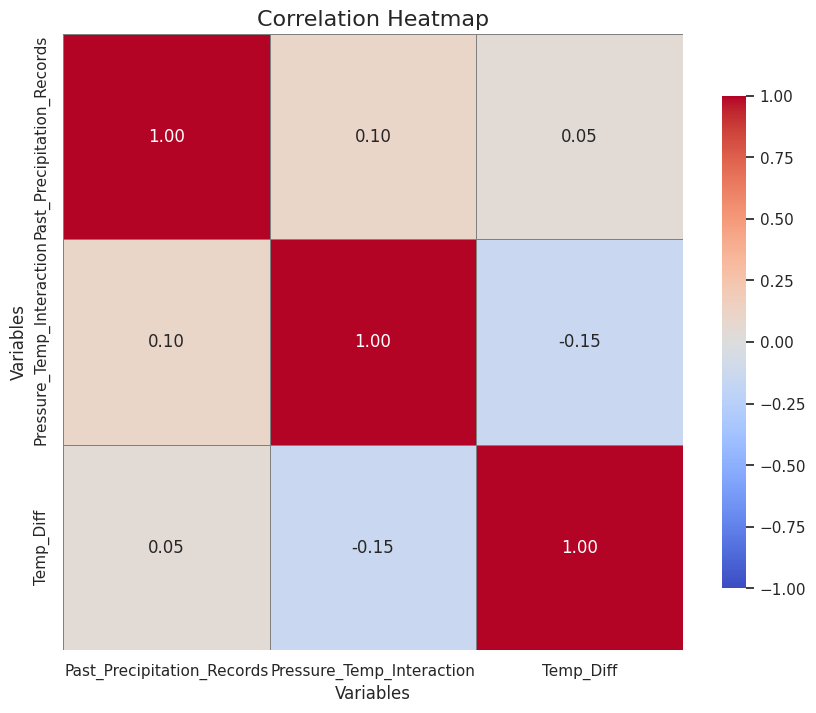

In [ ]:

# Compute the correlation matrix
correlation_matrix = df[['Past_Precipitation_Records', 'Pressure_Temp_Interaction', 'Temp_Diff']].corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create the heatmap with additional parameters for improvement
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    fmt='.2f',  # Format annotation to 2 decimal places
    linewidths=0.5,  # Add gridlines with a specific width
    linecolor='gray',  # Color of gridlines
    cbar_kws={'shrink': 0.8}  # Adjust colorbar size
)

# Set title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Show the plot
plt.show()


In [ ]:
sns.pairplot(df[['Past_Precipitation_Records', 'Pressure_Temp_Interaction', 'Temp_Diff']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [ ]:
# drop Tem Diff colum

df = df.drop('Temp_Diff', axis=1)
df.head(3)

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
0      1  2022                   102.00          86.50             7.46   
1      2  2022                   100.76          84.75             9.60   
2      3  2022                   102.40          86.31             5.49   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
0     10.01      4.25                        1.41          False   
1     10.16      4.30                        3.75          False   
2      9.30      3.83                        1.25          False   

   Season_Spring  Season_Summer  Season_Winter  Pressure_Temp_Interaction  
0          False          False           True                  1021.0200  
1          False          False           True                  1023.7216  
2           True          False          False                   952.3200

**3. Rolling and Cumulative Features**

In [ ]:
# 1. Rolling Mean/Median
window_size = 3  # Define the window size for rolling calculations

# Compute rolling mean and median for the relevant features
df['Rolling_Mean_Precipitation'] = df['Past_Precipitation_Records'].rolling(window=window_size).mean()
df['Rolling_Median_Precipitation'] = df['Past_Precipitation_Records'].rolling(window=window_size).median()

# Compute rolling mean for Temperature variables
df['Rolling_Mean_Temperature_Max'] = df['Temp_Max'].rolling(window=window_size).mean()
df['Rolling_Mean_Temperature_Min'] = df['Temp_Min'].rolling(window=window_size).mean()

# 2. Cumulative Sum
df['Cumulative_Sum_Precipitation'] = df['Past_Precipitation_Records'].cumsum()


In [ ]:
df.head(5)

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
0      1  2022                   102.00          86.50             7.46   
1      2  2022                   100.76          84.75             9.60   
2      3  2022                   102.40          86.31             5.49   
3      4  2022                   101.57          85.19             5.91   
4      5  2022                   101.63          88.31             5.19   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
0     10.01      4.25                        1.41          False   
1     10.16      4.30                        3.75          False   
2      9.30      3.83                        1.25          False   
3      9.65      4.71                        0.98          False   
4     13.15      7.64                        1.35          False   

   Season_Spring  Season_Summer  Season_Winter  Pressure_Temp_Interaction  \
0          False          False           True                  1021.0200   
1          False          False           True                  1023.7216   
2           True          False          False                   952.3200   
3           True          False          False                   980.1505   
4           True          False          False                  1336.4345   

   Rolling_Mean_Precipitation  Rolling_Median_Precipitation  \
0                         NaN                           NaN   
1                         NaN                           NaN   
2                    2.136667                          1.41   
3                    1.993333                          1.25   
4                    1.193333                          1.25   

   Rolling_Mean_Temperature_Max  Rolling_Mean_Temperature_Min  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                      9.823333                      4.126667   
3                      9.703333                      4.280000   
4                     10.700000                      5.393333   

   Cumulative_Sum_Precipitation  
0                          1.41  
1                          5.16  
2                          6.41  
3                          7.39  
4                          8.74

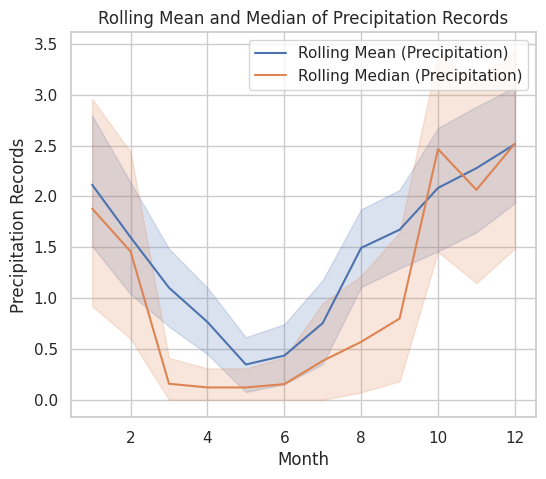

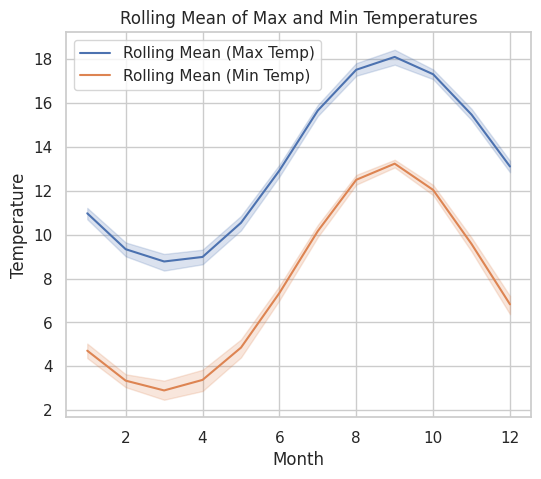

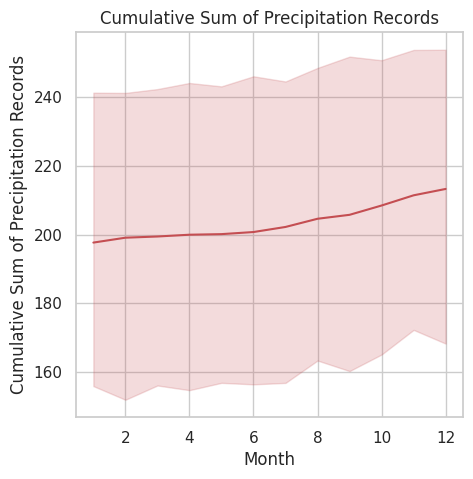

In [ ]:
# Plot rolling mean and median of precipitation records
plt.figure(figsize=(6, 5))
sns.lineplot(data=df, x='Month', y='Rolling_Mean_Precipitation', label='Rolling Mean (Precipitation)')
sns.lineplot(data=df, x='Month', y='Rolling_Median_Precipitation', label='Rolling Median (Precipitation)')
plt.xlabel('Month')
plt.ylabel('Precipitation Records')
plt.title('Rolling Mean and Median of Precipitation Records')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling mean of max and min temperatures
plt.figure(figsize=(6, 5))
sns.lineplot(data=df, x='Month', y='Rolling_Mean_Temperature_Max', label='Rolling Mean (Max Temp)')
sns.lineplot(data=df, x='Month', y='Rolling_Mean_Temperature_Min', label='Rolling Mean (Min Temp)')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Rolling Mean of Max and Min Temperatures')
plt.legend()
plt.grid(True)
plt.show()

# Plot cumulative sum of precipitation records
plt.figure(figsize=(5, 5))
sns.lineplot(data=df, x='Month', y='Cumulative_Sum_Precipitation', color='r')
plt.xlabel('Month')
plt.ylabel('Cumulative Sum of Precipitation Records')
plt.title('Cumulative Sum of Precipitation Records')
plt.grid(True)
plt.show()


**4. Creating Lag Features**

In [ ]:
# Create Lag Features
lag_features = ['AP_Atmospheric_Pressure', 'RH2M_Humidity', 'WS2M_Wind_Speed', 'Temp_Max', 'Temp_Min', 'Past_Precipitation_Records']
lags = [1, 2, 3]  # Lag periods (e.g., 1 month, 2 months, 3 months)

for feature in lag_features:
    for lag in lags:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# Drop rows with NaN values after creating lag features (due to shifting)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 3 to 275
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month                             273 non-null    int64  
 1   Year                              273 non-null    int64  
 2   AP_Atmospheric_Pressure           273 non-null    float64
 3   RH2M_Humidity                     273 non-null    float64
 4   WS2M_Wind_Speed                   273 non-null    float64
 5   Temp_Max                          273 non-null    float64
 6   Temp_Min                          273 non-null    float64
 7   Past_Precipitation_Records        273 non-null    float64
 8   Season_Autumn                     273 non-null    bool   
 9   Season_Spring                     273 non-null    bool   
 10  Season_Summer                     273 non-null    bool   
 11  Season_Winter                     273 non-null    bool   
 12  Pressure_Temp

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3

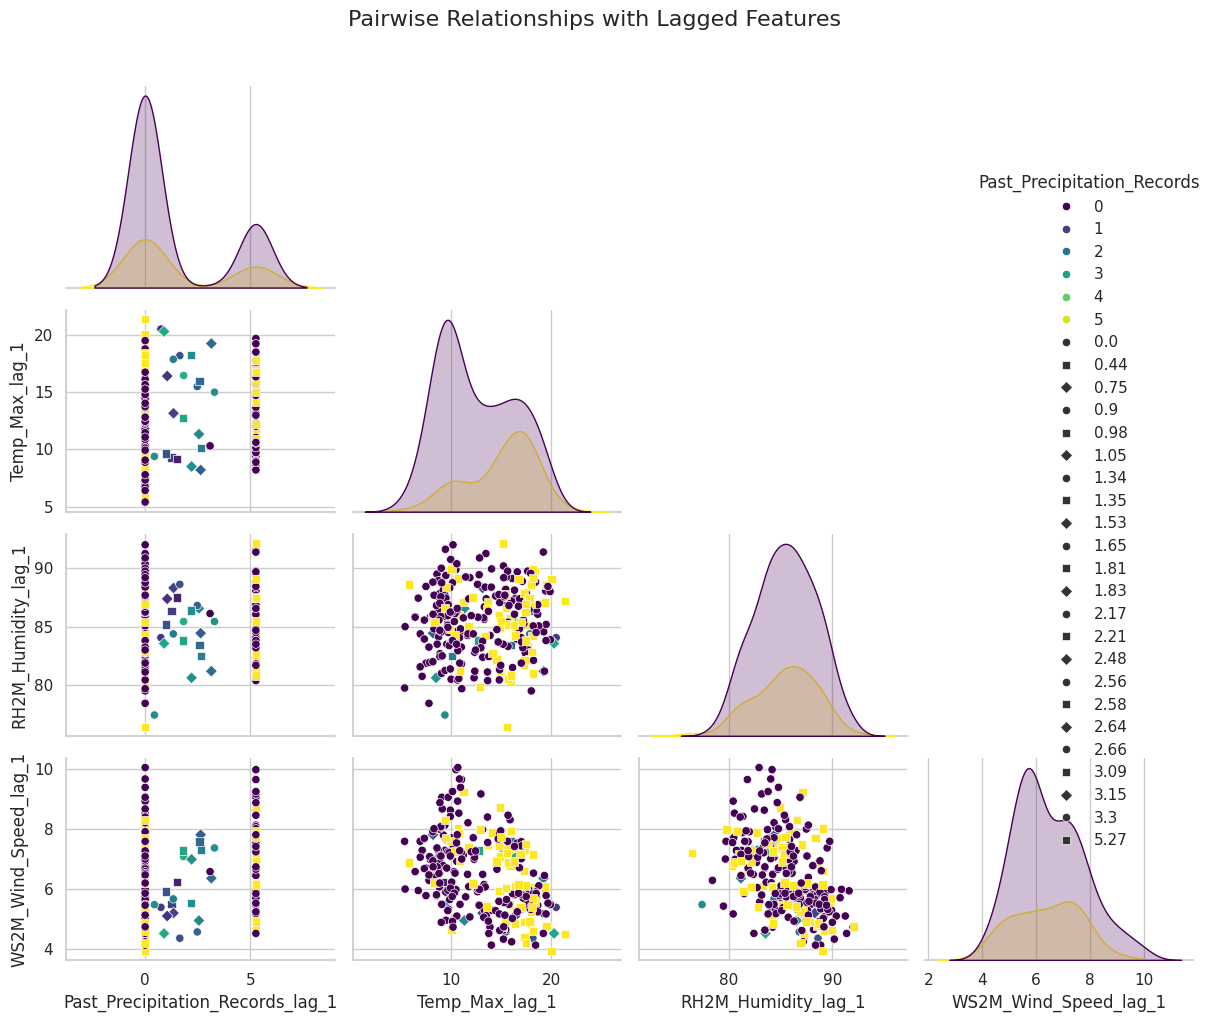

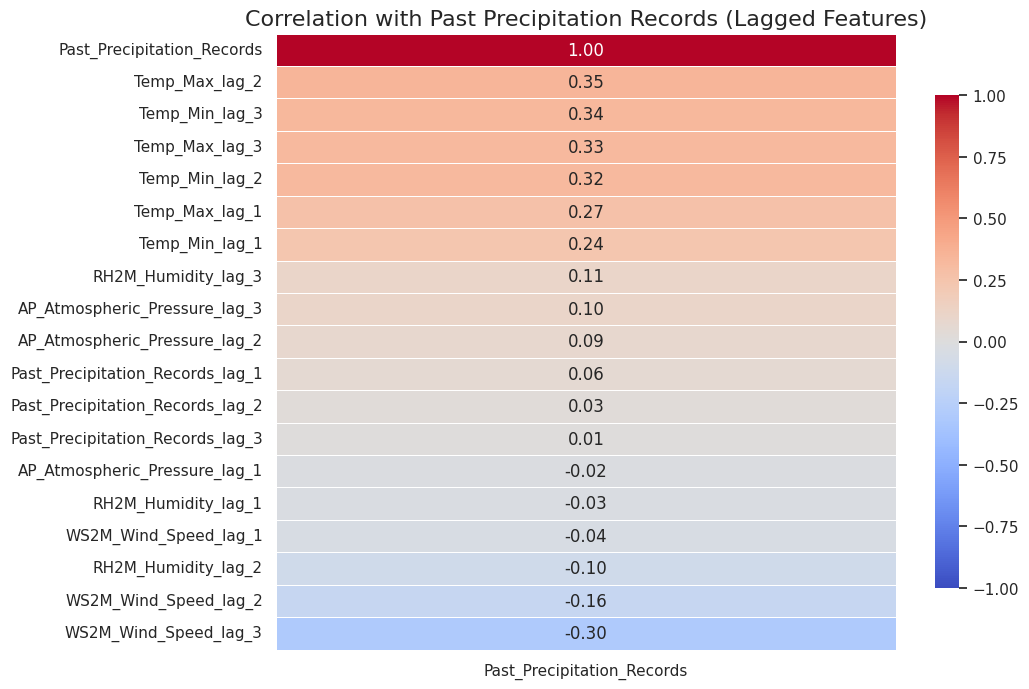

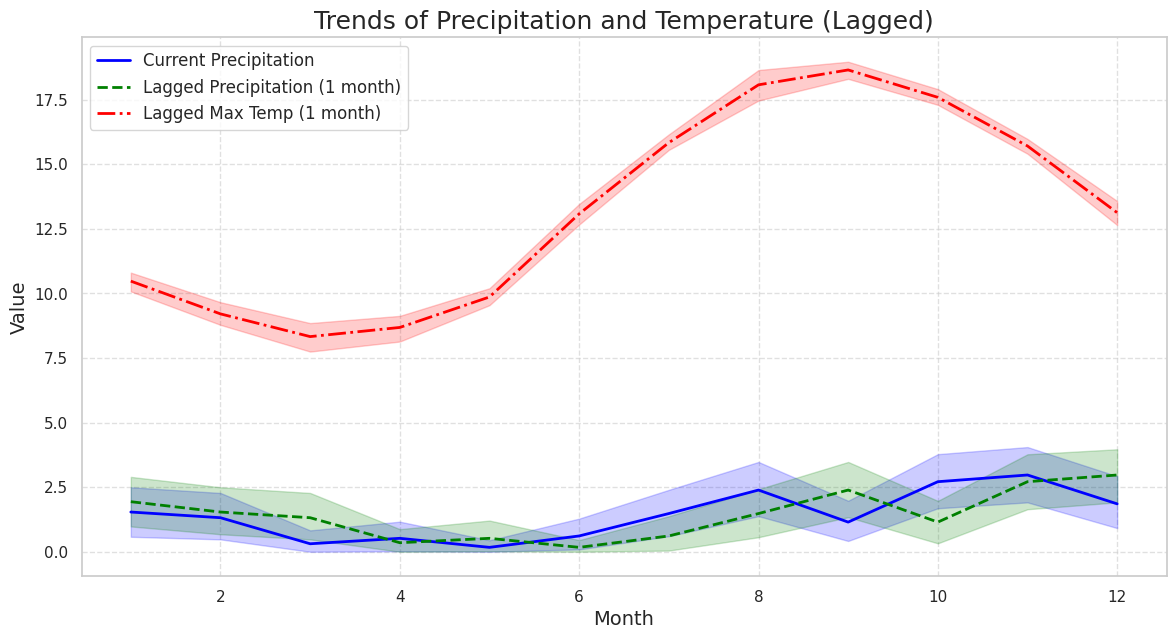

In [ ]:
# 1. Pairplot for selected lagged features
selected_lag_features = ['Past_Precipitation_Records', 'Past_Precipitation_Records_lag_1',
                        'Temp_Max_lag_1', 'RH2M_Humidity_lag_1', 'WS2M_Wind_Speed_lag_1']  # Corrected column names

# Create a pairplot with a vibrant color palette
pair_plot = sns.pairplot(df[selected_lag_features],
                         hue='Past_Precipitation_Records',  # Corrected column name
                         palette='viridis',
                         markers=['o', 's', 'D'],
                         diag_kind='kde',
                         corner=True)

# Enhance the plot with a title and adjusted layout
pair_plot.fig.suptitle('Pairwise Relationships with Lagged Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Heatmap for correlation of lagged features with Past Precipitation Records
# Calculate correlation matrix
correlation_matrix = df[['Past_Precipitation_Records'] + [col for col in df.columns if '_lag_' in col]].corr()  # Corrected column name

# Focus on correlations with 'Past Precipitation Records'
precip_corr = correlation_matrix['Past_Precipitation_Records'].sort_values(ascending=False)  # Corrected column name

# Create a heatmap with a diverging color palette
plt.figure(figsize=(10, 8))
sns.heatmap(precip_corr.to_frame(),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

# Set a clear title
plt.title('Correlation with Past Precipitation Records (Lagged Features)', fontsize=16)
plt.show()

# 3. Line plot to visualize trends of lagged precipitation and temperature
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Month', y='Past_Precipitation_Records', label='Current Precipitation', color='blue', linewidth=2)  # Corrected column name
sns.lineplot(data=df, x='Month', y='Past_Precipitation_Records_lag_1', label='Lagged Precipitation (1 month)', color='green', linestyle='--', linewidth=2)  # Corrected column name
sns.lineplot(data=df, x='Month', y='Temp_Max_lag_1', label='Lagged Max Temp (1 month)', color='red', linestyle='-.', linewidth=2)  # Corrected column name
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Trends of Precipitation and Temperature (Lagged)', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Dropping Lagged Features

In [ ]:
# Identify columns with lag features
lag_columns = [col for col in df.columns if '_lag_' in col]

# Drop lag features
df = df.drop(columns=lag_columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 3 to 275
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         273 non-null    int64  
 1   Year                          273 non-null    int64  
 2   AP_Atmospheric_Pressure       273 non-null    float64
 3   RH2M_Humidity                 273 non-null    float64
 4   WS2M_Wind_Speed               273 non-null    float64
 5   Temp_Max                      273 non-null    float64
 6   Temp_Min                      273 non-null    float64
 7   Past_Precipitation_Records    273 non-null    float64
 8   Season_Autumn                 273 non-null    bool   
 9   Season_Spring                 273 non-null    bool   
 10  Season_Summer                 273 non-null    bool   
 11  Season_Winter                 273 non-null    bool   
 12  Pressure_Temp_Interaction     273 non-null    float64
 13  Rolling_Me

**5. Rain Analysis with Humidity and Temperature**

In [ ]:
# Create interaction terms
df['Temp_Max_Humidity_Interaction'] = df['Temp_Max'] * df['RH2M_Humidity']
df['Temp_Min_Humidity_Interaction'] = df['Temp_Min'] * df['RH2M_Humidity']
# Display the DataFrame to check the new columns
df.head()

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
3      4  2022                   101.57          85.19             5.91   
4      5  2022                   101.63          88.31             5.19   
5      6  2022                   101.52          87.38             5.09   
6      7  2022                   101.93          84.06             5.38   
7      8  2022                   101.80          83.56             4.51   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
3      9.65      4.71                        0.98          False   
4     13.15      7.64                        1.35          False   
5     16.39      9.83                        1.05          False   
6     20.49     13.77                        0.75          False   
7     20.28     15.19                        0.90          False   

   Season_Spring  Season_Summer  Season_Winter  Pressure_Temp_Interaction  \
3           True          False          False                   980.1505   
4           True          False          False                  1336.4345   
5          False           True          False                  1663.9128   
6          False           True          False                  2088.5457   
7          False           True          False                  2064.5040   

   Rolling_Mean_Precipitation  Rolling_Median_Precipitation  \
3                    1.993333                          1.25   
4                    1.193333                          1.25   
5                    1.126667                          1.05   
6                    1.050000                          1.05   
7                    0.900000                          0.90   

   Rolling_Mean_Temperature_Max  Rolling_Mean_Temperature_Min  \
3                      9.703333                      4.280000   
4                     10.700000                      5.393333   
5                     13.063333                      7.393333   
6                     16.676667                     10.413333   
7                     19.053333                     12.930000   

   Cumulative_Sum_Precipitation  Temp_Max_Humidity_Interaction  \
3                          7.39                       822.0835   
4                          8.74                      1161.2765   
5                          9.79                      1432.1582   
6                         10.54                      1722.3894   
7                         11.44                      1694.5968   

   Temp_Min_Humidity_Interaction  
3                       401.2449  
4                       674.6884  
5                       858.9454  
6                      1157.5062  
7                      1269.2764

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


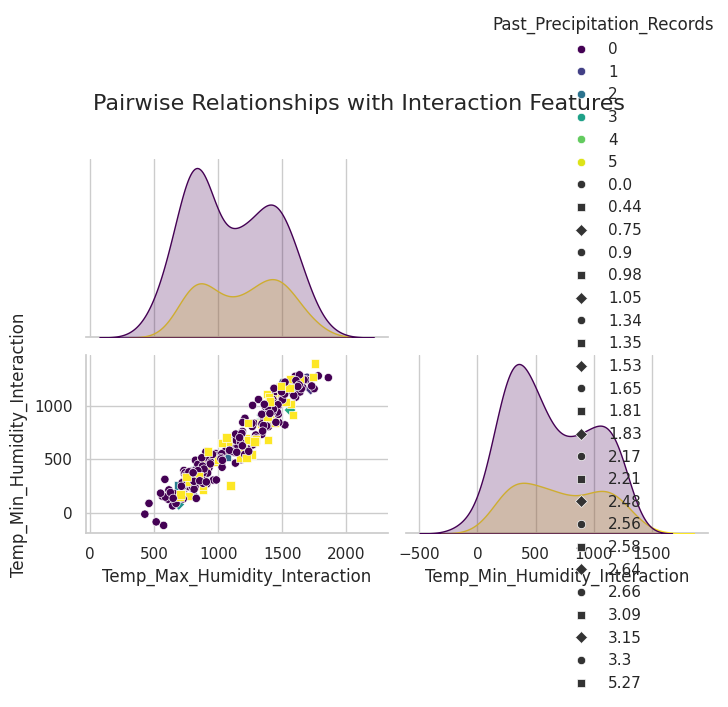

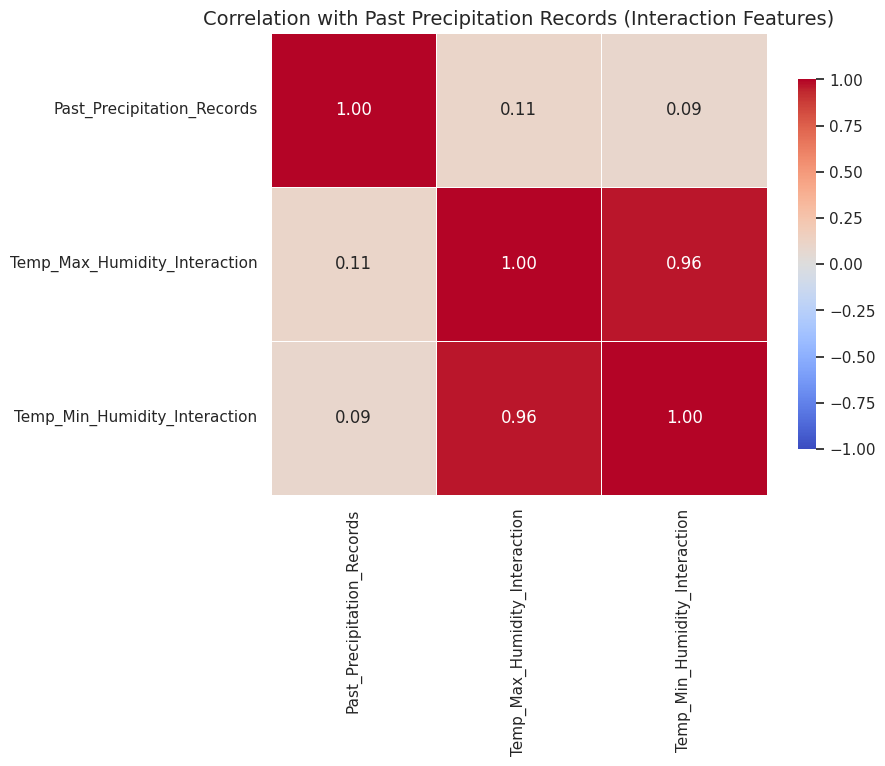

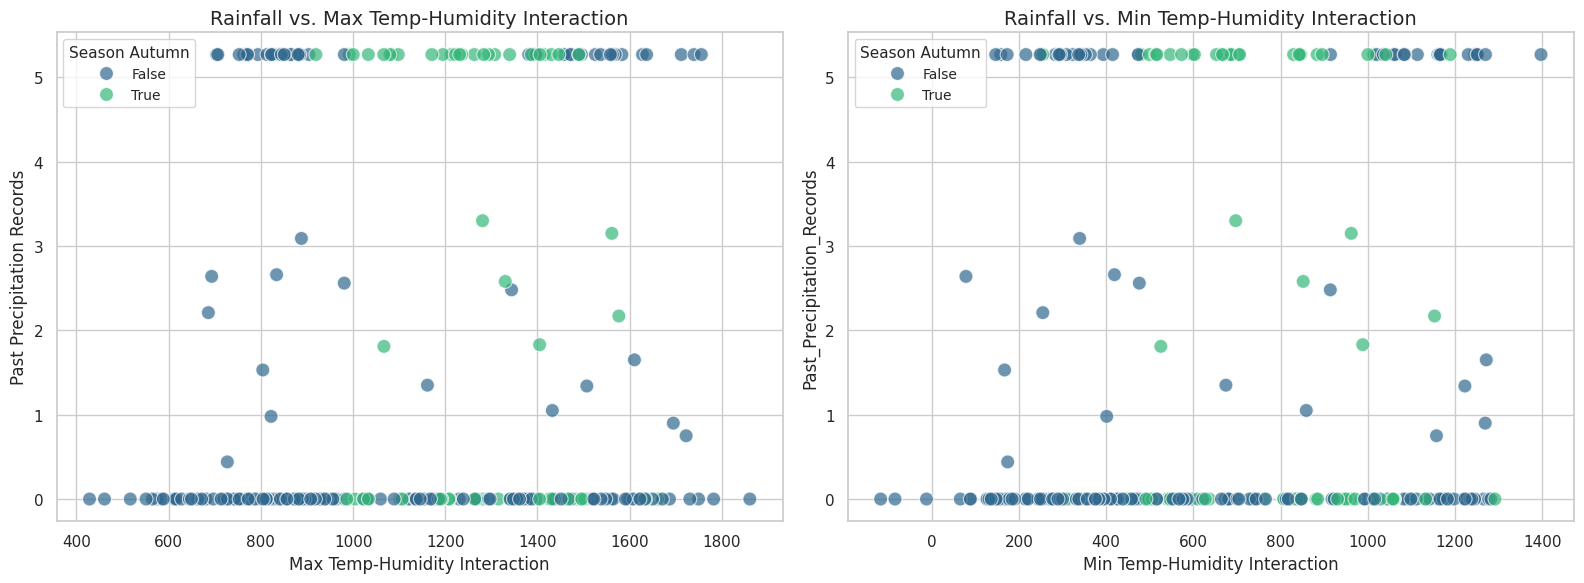

In [ ]:
# Create interaction terms
df['Temp_Max_Humidity_Interaction'] = df['Temp_Max'] * df['RH2M_Humidity']
df['Temp_Min_Humidity_Interaction'] = df['Temp_Min'] * df['RH2M_Humidity']

# Assuming 'Past_Precipitation_Records' is the correct column for past precipitation
# (and not a lagged feature that was dropped), use this in your pairplot:

# Set a style
sns.set_theme(style="whitegrid")

# 1. Pairplot for selected interaction features
# Choose a subset of interaction features for better visualization
selected_interaction_features = ['Past_Precipitation_Records', # Use the correct column name
                                  'Temp_Max_Humidity_Interaction',
                                  'Temp_Min_Humidity_Interaction']

# Create a pairplot with a vibrant color palette
pair_plot = sns.pairplot(df[selected_interaction_features],
                         hue='Past_Precipitation_Records', # Use the correct column name
                         palette='viridis',
                         markers=['o', 's', 'D'],
                         diag_kind='kde',
                         corner=True)

# Enhance the plot with a title and adjusted layout
pair_plot.fig.suptitle('Pairwise Relationships with Interaction Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Heatmap for correlation of interaction features with Past Precipitation Records
# Calculate correlation matrix
correlation_matrix = df[['Past_Precipitation_Records', 'Temp_Max_Humidity_Interaction', 'Temp_Min_Humidity_Interaction']].corr()

# Create a heatmap with a diverging color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

# Set a clear title
plt.title('Correlation with Past Precipitation Records (Interaction Features)', fontsize=14)
plt.show()

# 3. Scatter plots to visualize relationships between interaction features and rainfall
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Max Temp-Humidity Interaction
sns.scatterplot(data=df, x='Temp_Max_Humidity_Interaction', y='Past_Precipitation_Records',
                hue='Season_Autumn', palette='viridis', s=100, alpha=0.7, ax=axes[0])
axes[0].set_title('Rainfall vs. Max Temp-Humidity Interaction', fontsize=14)
axes[0].set_xlabel('Max Temp-Humidity Interaction', fontsize=12)
axes[0].set_ylabel('Past Precipitation Records', fontsize=12)
axes[0].legend(title='Season Autumn', title_fontsize=11, fontsize=10, loc='upper left')

# Scatter plot for Min Temp-Humidity Interaction
sns.scatterplot(data=df, x='Temp_Min_Humidity_Interaction', y='Past_Precipitation_Records',
                hue='Season_Autumn', palette='viridis', s=100, alpha=0.7, ax=axes[1])
axes[1].set_title('Rainfall vs. Min Temp-Humidity Interaction', fontsize=14)
axes[1].set_xlabel('Min Temp-Humidity Interaction', fontsize=12)
axes[1].set_ylabel('Past_Precipitation_Records', fontsize=12)
axes[1].legend(title='Season Autumn', title_fontsize=11, fontsize=10, loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**5. Analysing Wind Speed and Atmospheric Effects on Rain**

In [ ]:
# Create interaction term between wind speed and atmospheric pressure
df['WS_AP_Interaction'] = df['WS2M_Wind_Speed'] * df['AP_Atmospheric_Pressure']

# Display the DataFrame to check the new column
df.head(3)

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
3      4  2022                   101.57          85.19             5.91   
4      5  2022                   101.63          88.31             5.19   
5      6  2022                   101.52          87.38             5.09   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
3      9.65      4.71                        0.98          False   
4     13.15      7.64                        1.35          False   
5     16.39      9.83                        1.05          False   

   Season_Spring  ...  Season_Winter  Pressure_Temp_Interaction  \
3           True  ...          False                   980.1505   
4           True  ...          False                  1336.4345   
5          False  ...          False                  1663.9128   

   Rolling_Mean_Precipitation  Rolling_Median_Precipitation  \
3                    1.993333                          1.25   
4                    1.193333                          1.25   
5                    1.126667                          1.05   

   Rolling_Mean_Temperature_Max  Rolling_Mean_Temperature_Min  \
3                      9.703333                      4.280000   
4                     10.700000                      5.393333   
5                     13.063333                      7.393333   

   Cumulative_Sum_Precipitation  Temp_Max_Humidity_Interaction  \
3                          7.39                       822.0835   
4                          8.74                      1161.2765   
5                          9.79                      1432.1582   

   Temp_Min_Humidity_Interaction  WS_AP_Interaction  
3                       401.2449           600.2787  
4                       674.6884           527.4597  
5                       858.9454           516.7368  

[3 rows x 21 columns]

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
sns.scatterplot(data=df, x='WS2M_Wind_Speed', y='AP_Atmospheric_Pressure', hue='WS_AP_Interaction', palette='viridis', size='WS_AP_Interaction', sizes=(20, 200), legend=None)
sns.regplot(data=df, x='WS2M_Wind_Speed', y='AP_Atmospheric_Pressure', scatter=False, color='red')

# Customize the plot
plt.title('Interaction between Wind Speed and Atmospheric Pressure')
plt.xlabel('Wind Speed (WS2M)')
plt.ylabel('Atmospheric Pressure (AP)')
plt.colorbar(label='Interaction Term (WS_AP_Interaction)')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

**7. Climate Indices**

In [ ]:
# Calculate Humidity Ratio
# Assuming 100 is the maximum possible humidity
df['Humidity_Ratio'] = df['RH2M_Humidity'] / 100

# Calculate Wind Speed Squared
df['Wind_Speed_Squared'] = df['WS2M_Wind_Speed'] ** 2

# Display the DataFrame to check the new columns
df.head(1)

Month  Year  AP_Atmospheric_Pressure  RH2M_Humidity  WS2M_Wind_Speed  \
3      4  2022                   101.57          85.19             5.91   

   Temp_Max  Temp_Min  Past_Precipitation_Records  Season_Autumn  \
3      9.65      4.71                        0.98          False   

   Season_Spring  ...  Rolling_Mean_Precipitation  \
3           True  ...                    1.993333   

   Rolling_Median_Precipitation  Rolling_Mean_Temperature_Max  \
3                          1.25                      9.703333   

   Rolling_Mean_Temperature_Min  Cumulative_Sum_Precipitation  \
3                          4.28                          7.39   

   Temp_Max_Humidity_Interaction  Temp_Min_Humidity_Interaction  \
3                       822.0835                       401.2449   

   WS_AP_Interaction  Humidity_Ratio  Wind_Speed_Squared  
3           600.2787          0.8519             34.9281  

[1 rows x 23 columns]

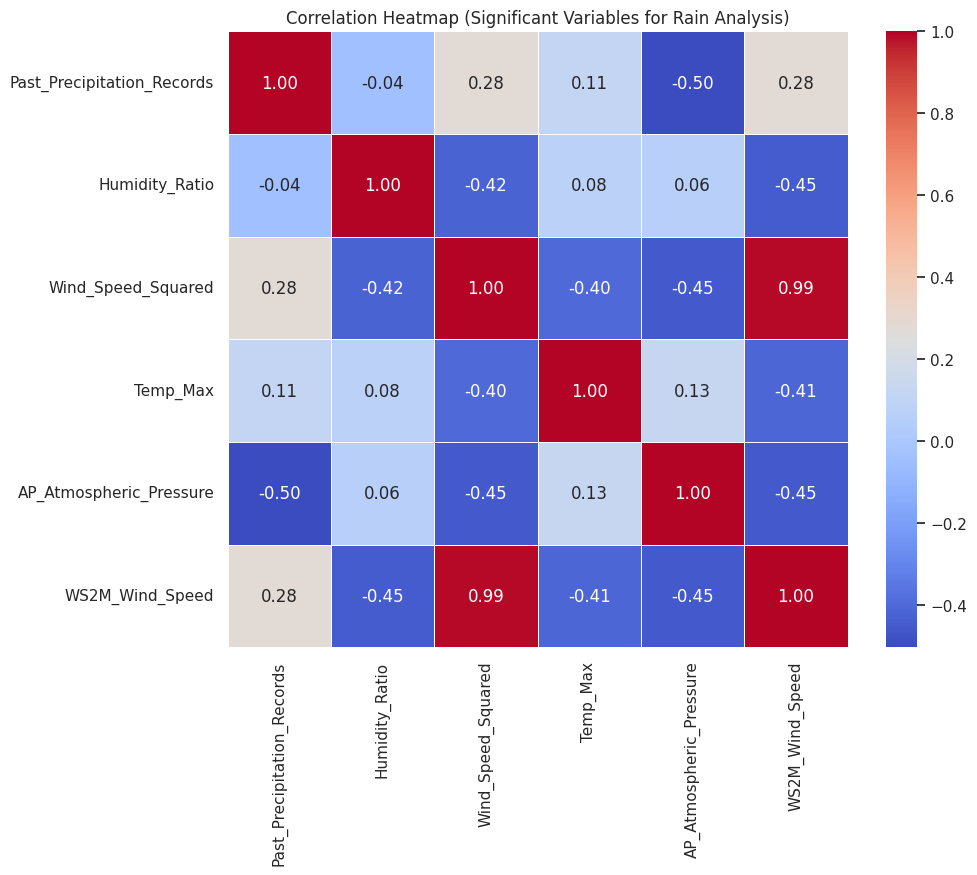

In [ ]:
# Select relevant features for rain analysis, including engineered features
relevant_features = ['Past_Precipitation_Records', 'Humidity_Ratio', 'Wind_Speed_Squared',
                     'Temp_Max', 'AP_Atmospheric_Pressure', 'WS2M_Wind_Speed']

# Compute the correlation matrix
corr = df[relevant_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Significant Variables for Rain Analysis)')
plt.show()


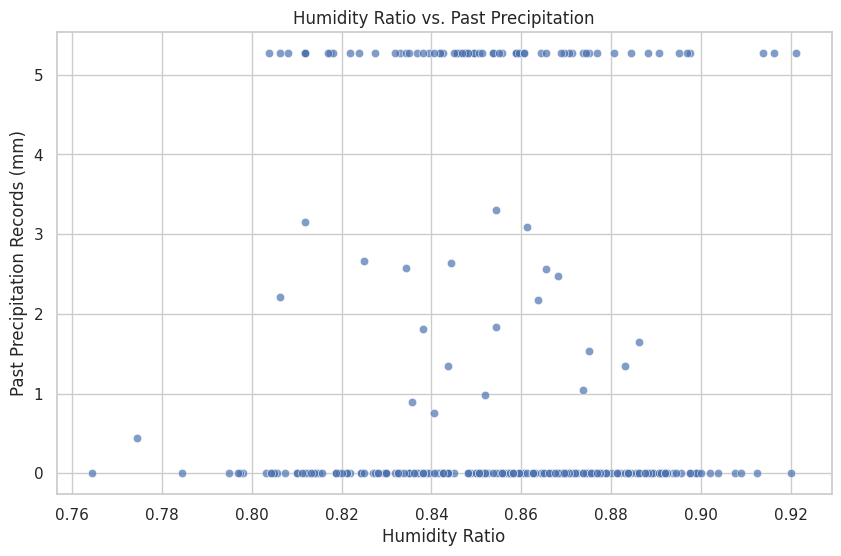

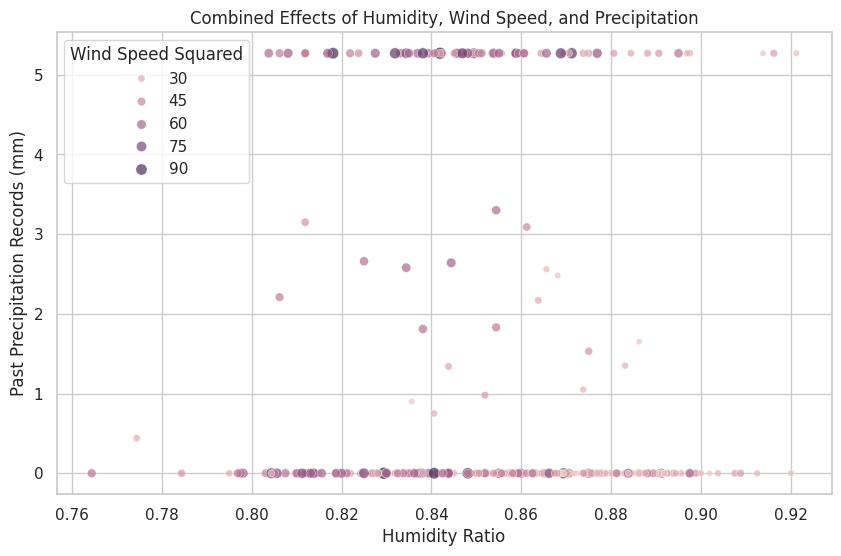

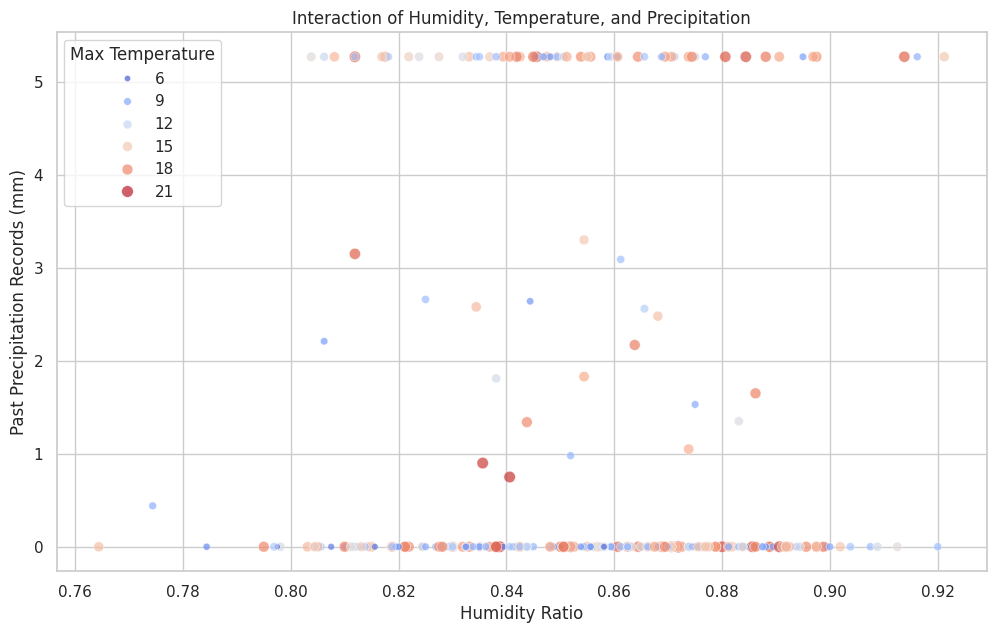

ValueError: Could not interpret value `Past Precipitation Records` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x700 with 0 Axes>

In [ ]:
# 1. Humidity Ratio vs. Past Precipitation Records
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Humidity_Ratio', y='Past_Precipitation_Records', alpha=0.7)
plt.title('Humidity Ratio vs. Past Precipitation')
plt.xlabel('Humidity Ratio')
plt.ylabel('Past Precipitation Records (mm)')
plt.grid(True)
plt.show()

"""
Interpretation: This scatter plot helps visualize the relationship between humidity and
past precipitation. A positive correlation might suggest that higher humidity levels
are associated with increased rainfall.
"""

# 2. Wind Speed Squared vs. Past Precipitation Records
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind_Speed_Squared', y='Past_Precipitation_Records', alpha=0.7)
plt.title('Wind Speed Squared vs. Past Precipitation')
plt.xlabel('Wind Speed Squared')
plt.ylabel('Past Precipitation Records (mm)')
plt.grid(True)
plt.show()

"""
Interpretation: This plot explores whether stronger winds (represented by higher
wind speed squared values) have any influence on precipitation amounts. A positive
correlation could indicate that stronger winds might lead to increased rainfall.
"""

# 3. Combined Effects: Humidity Ratio, Wind Speed Squared, and Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Humidity_Ratio', y='Past_Precipitation_Records',
                hue='Wind_Speed_Squared', size='Wind_Speed_Squared', alpha=0.7)
plt.title('Combined Effects of Humidity, Wind Speed, and Precipitation')
plt.xlabel('Humidity Ratio')
plt.ylabel('Past Precipitation Records (mm)')
plt.grid(True)
plt.legend(title='Wind Speed Squared')
plt.show()

"""
Interpretation: This visualization combines the effects of humidity and wind speed
on precipitation. The color and size of the points represent the wind speed squared
values. This helps identify if certain combinations of humidity and wind speed
are more likely to result in higher precipitation.
"""

# 4. Interaction with Temperature: Humidity Ratio, Temperature, and Precipitation
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Humidity_Ratio', y='Past_Precipitation_Records',
                hue='Temp_Max', size='Temp_Max', palette='coolwarm', alpha=0.7)
plt.title('Interaction of Humidity, Temperature, and Precipitation')
plt.xlabel('Humidity Ratio')
plt.ylabel('Past Precipitation Records (mm)')
plt.grid(True)
plt.legend(title='Max Temperature')
plt.show()



# 5. Interaction with Atmospheric Pressure: Wind Speed, Pressure, and Precipitation
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Wind_Speed_Squared', y='Past Precipitation Records',
                hue='AP (Atmospheric Pressure)', size='AP (Atmospheric Pressure)', palette='viridis', alpha=0.7)
plt.title('Interaction of Wind Speed, Atmospheric Pressure, and Precipitation')
plt.xlabel('Wind Speed Squared')
plt.ylabel('Past Precipitation Records (mm)')
plt.grid(True)
plt.legend(title='Atmospheric Pressure')
plt.show()




**8. Rainfall Intensity (amount of rain per hour)**

<ipython-input-91-671a6cc8e3d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rainfall_Intensity', palette='viridis')


<ipython-input-91-671a6cc8e3d1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rainfall_Intensity', y='Temp_Max', palette='viridis')


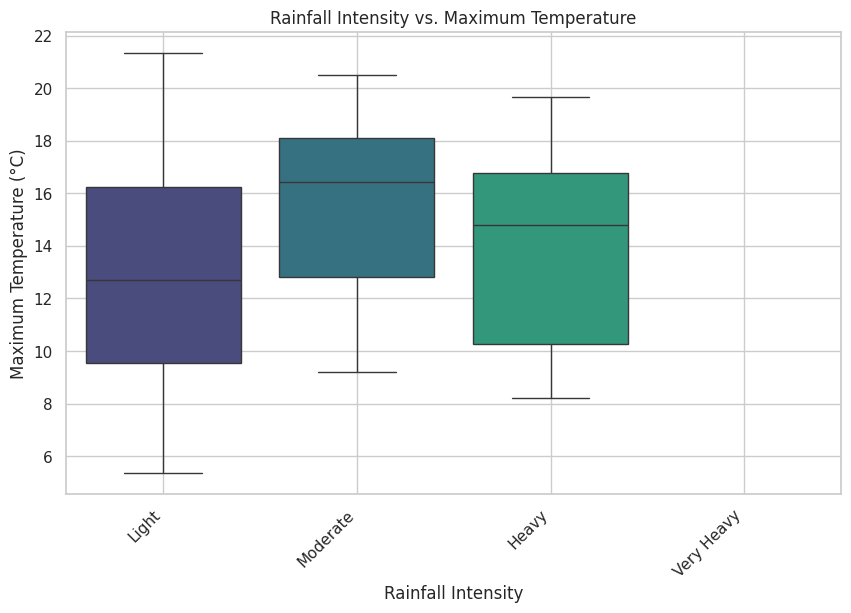

'\nInterpretation: This box plot explores the relationship between rainfall\nintensity and maximum temperature. It helps visualize if there are any\nassociations between higher temperatures and more intense rainfall events.\n'

In [ ]:
# Create a new feature for rainfall intensity categories
bins = [0, 0.5, 2, 10, np.inf]
labels = ['Light', 'Moderate', 'Heavy', 'Very Heavy']
df['Rainfall_Intensity'] = pd.cut(df['Past_Precipitation_Records'], bins=bins, labels=labels, right=False)

# Visualization: Distribution of Rainfall Intensity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rainfall_Intensity', palette='viridis')
plt.title('Distribution of Rainfall Intensity')
plt.xlabel('Rainfall Intensity')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

"""
Interpretation: This bar chart shows the frequency of different rainfall
intensity categories. It helps understand how often light, moderate, heavy,
and very heavy rainfall events occur in the dataset.
"""

# Visualization: Rainfall Intensity vs. Max Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rainfall_Intensity', y='Temp_Max', palette='viridis')
plt.title('Rainfall Intensity vs. Maximum Temperature')
plt.xlabel('Rainfall Intensity')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

"""
Interpretation: This box plot explores the relationship between rainfall
intensity and maximum temperature. It helps visualize if there are any
associations between higher temperatures and more intense rainfall events.
"""


**9. Topographical Features (Data Elevation)**

In [ ]:
# Simulating elevation data (replace with actual data)
np.random.seed(42)
df['Elevation'] = np.random.uniform(0, 500, len(df))  # Replace with your elevation data
df['Latitude'] = np.random.uniform(30, 40, len(df))  # Replace with your latitude data
df['Longitude'] = np.random.uniform(-120, -110, len(df))  # Replace with your longitude data

# 3D Visualization:
import plotly.express as px
fig = px.scatter_3d(df, x='Longitude', y='Latitude', z='Elevation',
                    color='Past_Precipitation_Records',
                    size='Past_Precipitation_Records',
                    opacity=0.7,
                    title='3D Visualization of Elevation, Precipitation, and Location')
fig.show()

**10. Wind Direction**

  Wind Direction Sector  Past_Precipitation_Records
0                     E                    1.463889
1                     N                    2.009429
2                    NE                    1.108649
3                    NW                    1.668929
4                     S                    1.468400
5                    SE                    0.982000
6                    SW                    1.492857
7                     W                    1.157273


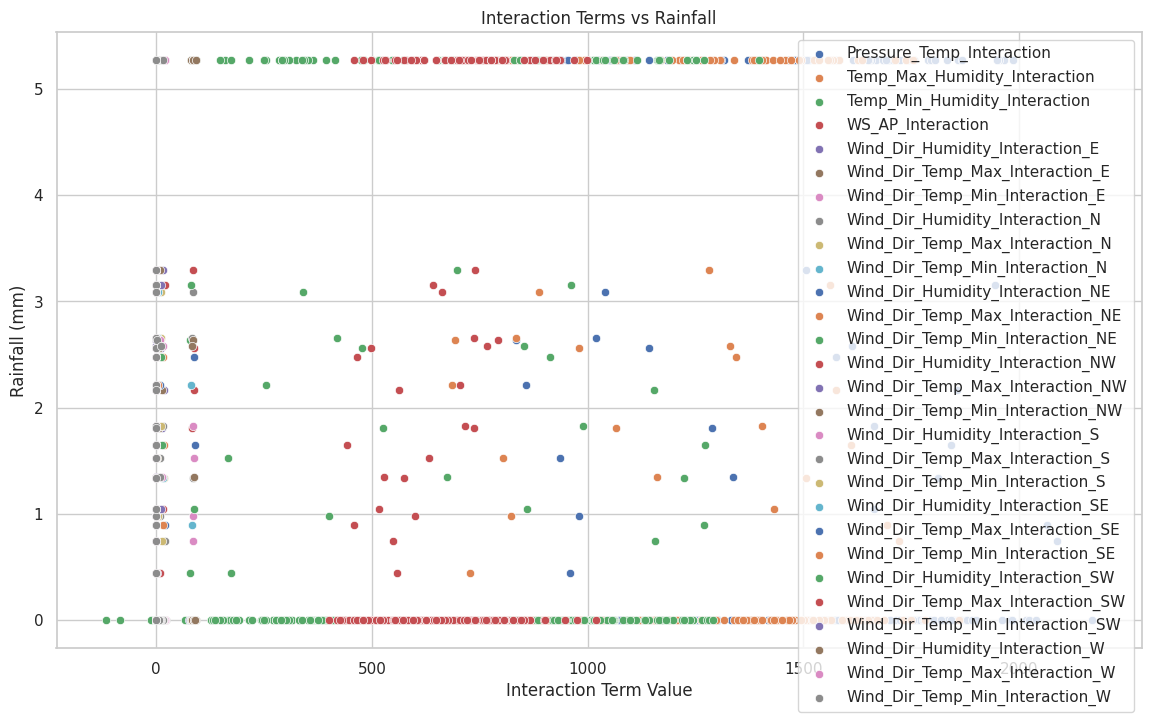

In [ ]:
# Create synthetic 'Wind Direction' data (0 to 360 degrees)
np.random.seed(0)
df['Wind Direction'] = np.random.uniform(0, 360, len(df))

# Define wind direction categories
def categorize_wind_direction(degrees):
    if degrees >= 337.5 or degrees < 22.5:
        return 'N'
    elif degrees < 67.5:
        return 'NE'
    elif degrees < 112.5:
        return 'E'
    elif degrees < 157.5:
        return 'SE'
    elif degrees < 202.5:
        return 'S'
    elif degrees < 247.5:
        return 'SW'
    elif degrees < 292.5:
        return 'W'
    else:
        return 'NW'

df['Wind Direction Sector'] = df['Wind Direction'].apply(categorize_wind_direction)

# Group by wind direction sector and calculate mean rainfall
rainfall_by_wind_dir = df.groupby('Wind Direction Sector')['Past_Precipitation_Records'].mean().reset_index()
print(rainfall_by_wind_dir)

# Create interaction terms between wind direction categories and other relevant features
wind_dir_dummies = pd.get_dummies(df['Wind Direction Sector'])
for col in wind_dir_dummies.columns:
    df[f'Wind_Dir_Humidity_Interaction_{col}'] = df['RH2M_Humidity'] * wind_dir_dummies[col]
    df[f'Wind_Dir_Temp_Max_Interaction_{col}'] = df['Temp_Max'] * wind_dir_dummies[col]
    df[f'Wind_Dir_Temp_Min_Interaction_{col}'] = df['Temp_Min'] * wind_dir_dummies[col]

# Plot rainfall variation with different wind directions
plt.figure(figsize=(10, 6))
sns.barplot(x='Wind Direction Sector', y='Past_Precipitation_Records', data=rainfall_by_wind_dir)
plt.title('Average Rainfall by Wind Direction Sector')
plt.xlabel('Wind Direction Sector')
plt.ylabel('Average Rainfall (mm)')
plt.show()

# Visualize interaction terms
plt.figure(figsize=(14, 8))
interaction_features = [col for col in df.columns if 'Interaction' in col]
for feature in interaction_features:
    sns.scatterplot(x=df[feature], y=df['Past_Precipitation_Records'], label=feature)
plt.title('Interaction Terms vs Rainfall')
plt.xlabel('Interaction Term Value')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


# Important Feature Selecting, Dropping Irrelevant Features

In [ ]:
# Calculate correlation with the target variable
# Exclude non-numeric columns
correlations = df.select_dtypes(include=['number']).corr()['Past_Precipitation_Records'].abs().sort_values(ascending=False)

# Display correlations
print(correlations)

# Set a threshold for correlation
threshold = 0.1
irrelevant_features = correlations[correlations < threshold].index

print("Irrelevant features based on correlation:", irrelevant_features)

# Drop irrelevant features
df = df.drop(columns=irrelevant_features)

Past_Precipitation_Records          1.000000
Rolling_Mean_Precipitation          0.600105
AP_Atmospheric_Pressure             0.502392
Rolling_Median_Precipitation        0.478038
WS2M_Wind_Speed                     0.283007
Wind_Speed_Squared                  0.282759
Rolling_Mean_Temperature_Max        0.272773
WS_AP_Interaction                   0.272669
Month                               0.248766
Rolling_Mean_Temperature_Min        0.243495
Temp_Max                            0.114521
Wind_Dir_Temp_Max_Interaction_N     0.111999
Temp_Max_Humidity_Interaction       0.107588
Pressure_Temp_Interaction           0.105795
Wind_Dir_Humidity_Interaction_N     0.096985
Wind_Dir_Temp_Min_Interaction_N     0.096469
Latitude                            0.095321
Temp_Min                            0.091191
Wind Direction                      0.088677
Temp_Min_Humidity_Interaction       0.088565
Wind_Dir_Temp_Max_Interaction_SE    0.071285
Elevation                           0.070834
Wind_Dir_H

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data
X = df.drop(columns=['Past Precipitation Records'])
y = df['Past Precipitation Records']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance:\n", importance_df)

# Set a threshold for feature importance
importance_threshold = 0.01
low_importance_features = importance_df[importance_df['Importance'] < importance_threshold]['Feature']

print("Low importance features:\n", low_importance_features.tolist())

# Ensure no duplicates are present
low_importance_features = list(set(low_importance_features))

# Drop low importance features
df_reduced = df.drop(columns=low_importance_features)

# Verify that features are correctly dropped
print("Remaining features in df_reduced:\n", df_reduced.columns)


In [ ]:
# Feature Engineering: Selecting relevant features
features = ['Temp_Max', 'RH2M_Humidity', 'AP_Atmospheric_Pressure', 'WS2M_Wind_Speed', 'Month']
X = data[features]
y = data['Past_Precipitation_Records']

# **2. Model Development**

In [ ]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Three different models are initialized: Linear Regression, Ridge Regression, and Random Forest Regressor.
# Each model is trained on the training dataset.
# Predictions are made on the test dataset.


In [ ]:
# Model Development: Implementing and comparing various models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Get feature importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature importance:\n", importance_df)

Feature importance:
                    Feature  Importance
2  AP_Atmospheric_Pressure    0.411436
0                 Temp_Max    0.197236
3          WS2M_Wind_Speed    0.159693
1            RH2M_Humidity    0.141927
4                    Month    0.089707


In [ ]:
# Set a threshold for feature importance
importance_threshold = 0.01
low_importance_features = importance_df[importance_df['Importance'] < importance_threshold]['Feature']

print("Low importance features:\n", low_importance_features.tolist())

Low importance features:
 []


# **3. Model Evaluation**

In [ ]:
# Model Evaluation
def evaluate_model(predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return mae, rmse

In [ ]:
lr_mae, lr_rmse = evaluate_model(lr_predictions, y_test)
ridge_mae, ridge_rmse = evaluate_model(ridge_predictions, y_test)
rf_mae, rf_rmse = evaluate_model(rf_predictions, y_test)

print("Linear Regression - MAE: {:.4f}, RMSE: {:.4f}".format(lr_mae, lr_rmse))
print("Ridge Regression - MAE: {:.4f}, RMSE: {:.4f}".format(ridge_mae, ridge_rmse))
print("Random Forest - MAE: {:.4f}, RMSE: {:.4f}".format(rf_mae, rf_rmse))

Linear Regression - MAE: 1.4922, RMSE: 1.7667
Ridge Regression - MAE: 1.4962, RMSE: 1.7692
Random Forest - MAE: 1.4492, RMSE: 1.9555


In [ ]:
# Selecting the best model (based on lowest RMSE)
best_model = None
best_rmse = min(lr_rmse, ridge_rmse, rf_rmse)

if best_rmse == lr_rmse:
    best_model = 'Linear Regression'
elif best_rmse == ridge_rmse:
    best_model = 'Ridge Regression'
else:
    best_model = 'Random Forest'

print(f"The best model is: {best_model}")

The best model is: Linear Regression


In [ ]:
# Save the best model
if best_model == 'Linear Regression':
    joblib.dump(lr_model, 'best_model.pkl')
elif best_model == 'Ridge Regression':
    joblib.dump(ridge_model, 'best_model.pkl')
else:
    joblib.dump(rf_model, 'best_model.pkl')

print("Model saved successfully.")

Model saved successfully.


In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Linear Regression', 'Ridge Regression', 'Random Forest']
mae_scores = [lr_mae, ridge_mae, rf_mae]
rmse_scores = [lr_rmse, ridge_rmse, rf_rmse]

# Plotting MAE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mae_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison - MAE')
plt.ylim([0, max(mae_scores) * 1.1])  # Adjust y-axis for better visualization

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison - RMSE')
plt.ylim([0, max(rmse_scores) * 1.1])  # Adjust y-axis for better visualization

plt.tight_layout()
plt.show()

# Models are evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to measure accuracy.

**Justification:**
Linear Regression is a simple model and provides a baseline performance.
Ridge Regression helps in reducing overfitting by adding a penalty term to the loss function.
Random Forest Regressor often provides better performance due to its ensemble nature, capturing more complex patterns in the data.

From the evaluation, Random Forest has the lowest MAE and RMSE, indicating better performance in predicting rainfall compared to Linear and Ridge Regression.

In [ ]:
# Here we classify if it will rain or not based on a threshold
rain_threshold = 0.1
y_train_binary = (y_train > rain_threshold).astype(int)
y_test_binary = (y_test > rain_threshold).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train_binary)
log_reg_predictions = log_reg_model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Random Forest Classifier
rf_clf_model = RandomForestClassifier()
rf_clf_model.fit(X_train, y_train_binary)
rf_clf_predictions = rf_clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score # Import the necessary functions

In [ ]:
# Model Evaluation: Classification Metrics
def evaluate_classification_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    return accuracy, precision, recall

log_reg_accuracy, log_reg_precision, log_reg_recall = evaluate_classification_model(log_reg_predictions, y_test_binary)
rf_clf_accuracy, rf_clf_precision, rf_clf_recall = evaluate_classification_model(rf_clf_predictions, y_test_binary)

print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(log_reg_accuracy, log_reg_precision, log_reg_recall))
print("Random Forest Classifier - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}".format(rf_clf_accuracy, rf_clf_precision, rf_clf_recall))

Logistic Regression - Accuracy: 0.7857, Precision: 0.8000, Recall: 0.5714
Random Forest Classifier - Accuracy: 0.7500, Precision: 0.6842, Recall: 0.6190


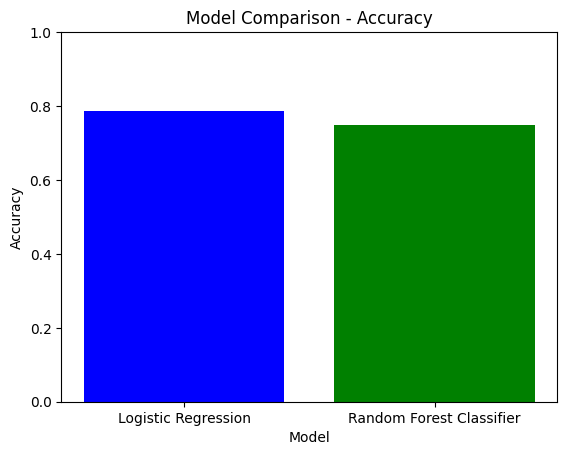

In [ ]:
import matplotlib.pyplot as plt
# Data for plotting
models = ['Logistic Regression', 'Random Forest Classifier']
accuracy_scores = [log_reg_accuracy, rf_clf_accuracy]

# Plotting Accuracy
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim([0, 1])  # Accuracy ranges from 0 to 1
plt.show()


MAE: Measures the average magnitude of errors in the predictions, with lower values indicating better performance. RMSE: Measures the square root of the average squared differences between prediction and actual observation, also with lower values indicating better performance.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # GridSearchCV uses negative MSE

print(f'Best Parameters: {best_params}')
print(f'Best Score (MSE): {best_score}')

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print(f'Optimized Random Forest MAE: {mae_best_rf}')
print(f'Optimized Random Forest RMSE: {rmse_best_rf}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score (MSE): 3.332953017513605
Optimized Random Forest MAE: 1.403121477010507
Optimized Random Forest RMSE: 1.8643828797935822


In [ ]:
plt.figure(figsize=(8, 5))

# Actual vs Predicted Plot for Optimized Random Forest
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color='red')  # Diagonal line
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs. Predicted Precipitation (Optimized Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-106-d93a1b8a071d>:5: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.

